In [63]:
import cv2 as cv
import numpy as np
from slic import SlicSegmentation
from utils import *
from processing import lab_segmentation
import matplotlib.pyplot as plt

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, active_contour
from skimage.filters import threshold_multiotsu, threshold_otsu, gaussian
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage import io, color

## SLIC

In [18]:
slic = SlicSegmentation(k=10, m=20)
slic.process("pitt_copy.jpeg")

100%|██████████| 10/10 [06:32<00:00, 39.26s/it]


In [22]:
slic_image = cv.imread(r"sample\pitt_copy_out_m20_k10.png")
segmented_lab = lab_segmentation(slic_image, 0, 106, 105, 164, 51, 177)
save(segmented_lab, r"pitt_copy_out_m20_k10.png", "lab")

Image saved at :  sample\pitt_copy_out_m20_k10_lab.png


In [ ]:
lab_image = cv.imread(r"sample\pitt_out_m20_k200_lab.png")
gray_image = cv.cvtColor(lab_image, cv.COLOR_BGR2GRAY)
_, thres_image = cv.threshold(gray_image, 128, 255, cv.THRESH_OTSU)
save(thres_image, "pitt_copy_thres")
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

In [ ]:

plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

## felzenszwalb

Lossy conversion from int64 to uint8. Range [0, 129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Image saved at :  sample\felzen_sample_1_seg.png


Lossy conversion from int64 to uint8. Range [0, 2]. Convert image to uint8 prior to saving to suppress this warning.


Image saved at :  sample\felzen_sample_1_bdry.png
Image saved at :  sample\felzen_sample_1_thres.png


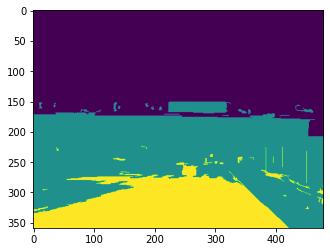

In [127]:
folder_name = r"sample"
image_name = r"sample_1.jpg"
source_image = io.imread(os.path.join(folder_name, image_name), plugin="matplotlib")

felzen_image = felzenszwalb(source_image, scale=1000, sigma=0.5, min_size=10)
save(felzen_image, image_name, "sk", "felzen_", "_seg")

thresholds = threshold_multiotsu(felzen_image)
thres_image = np.digitize(felzen_image, bins=thresholds)
# thres_image = threshold_otsu(felzen_image)
# thres_image = felzen_image > thres_image
save(mark_boundaries(source_image, thres_image), image_name, "sk","felzen_", "_bdry")
save(thres_image, image_name, "sk","felzen_", "_thres")

plt.imshow(thres_image)


C:\Users\chinm\AppData\Local\Temp/ipykernel_30776/742694924.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_felzen = rgb2gray(thres_image)


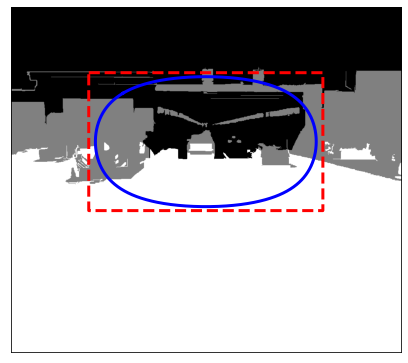

In [120]:
gray_felzen = rgb2gray(thres_image)

h, w = gray_felzen.shape
c = [int(w / 2), int(h / 2) - 100]

vert = int(0.4 * h / 2)
hori = int(0.6 * w / 2)

h_elements = 400
v_elements = 400
topx = np.linspace(c[0] - hori, c[0] + hori, h_elements)
topy = np.linspace(c[1] - vert, c[1] - vert, h_elements)
rightx = np.linspace(c[0] + hori, c[0] + hori, v_elements)
righty = np.linspace(c[1] - vert, c[1] + vert, v_elements)
bottomx = np.linspace(c[0] + hori, c[0] - hori, h_elements)
bottomy = np.linspace(c[1] + vert, c[1] + vert, h_elements)
leftx = np.linspace(c[0] - hori, c[0] - hori, v_elements)
lefty = np.linspace(c[1] + vert, c[1] - vert, v_elements)

x = np.hstack((topx, rightx, bottomx, leftx))
y = np.hstack((topy, righty, bottomy, lefty))

init = np.vstack([y, x]).T


snake = active_contour(gaussian(gray_felzen, 3, preserve_range=False),
                       init, 
                       alpha=0.015, 
                       beta=5, 
                       gamma=0.001, 
                       )

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_felzen, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_felzen.shape[1], gray_felzen.shape[0], 0])

plt.show()